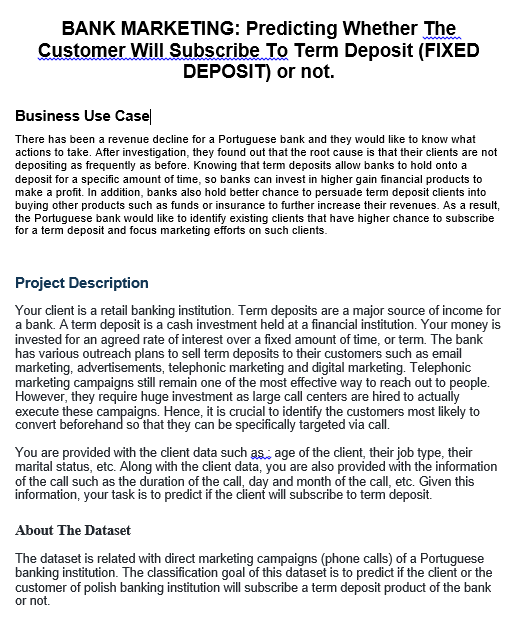
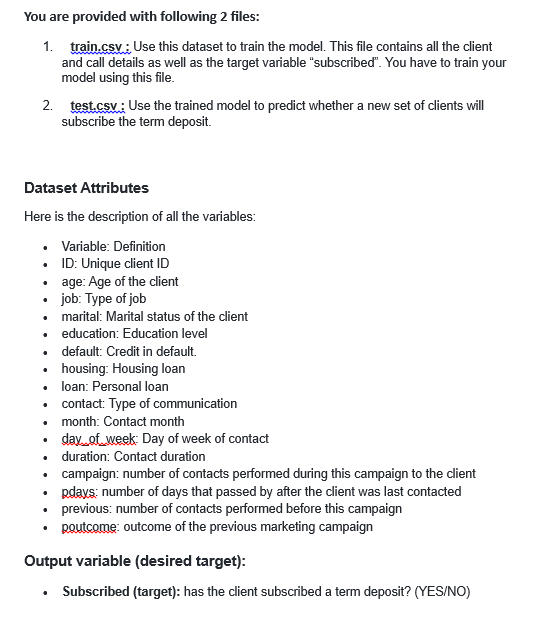
Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv
•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_test=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [3]:
df_train=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
# check the df structe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [4]:
# droping Id column
df_train=df_train.drop('ID',axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [6]:
# describe df numerical columns
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df_train.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
df_train.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [ ]:
# no null and missin value in the train data set

In [9]:
categorical_features=[feature for feature in df_train.columns if ((df_train[feature].dtypes=='O') & (feature not in ['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [10]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


In [12]:
df_train['poutcome'].value_counts()

poutcome
unknown    25929
failure     3362
other       1288
success     1068
Name: count, dtype: int64

In [14]:
for i in df_train.columns:
    print(df_train[i].value_counts())
    

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64
job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64
marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64
education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64
default
no     31062
yes      585
Name: count, dtype: int64
balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: count, Length: 6326, dtype: int64
housing
yes    17584
no     14063
Name: count, dtype: int64
loan
no   

In [15]:
df_train.dtypes.index

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [16]:
# checking for numerical columns

num_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]!='object':
        num_col.append(i)

num_col

    

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [18]:
# checking for numerical columns

cat_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]=='object':
        cat_col.append(i)

cat_col

    

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [19]:
# checking the unique value of each column 

df_train.nunique().to_frame('No of unique value')

,No of unique value
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


In [ ]:
#Data visualization 


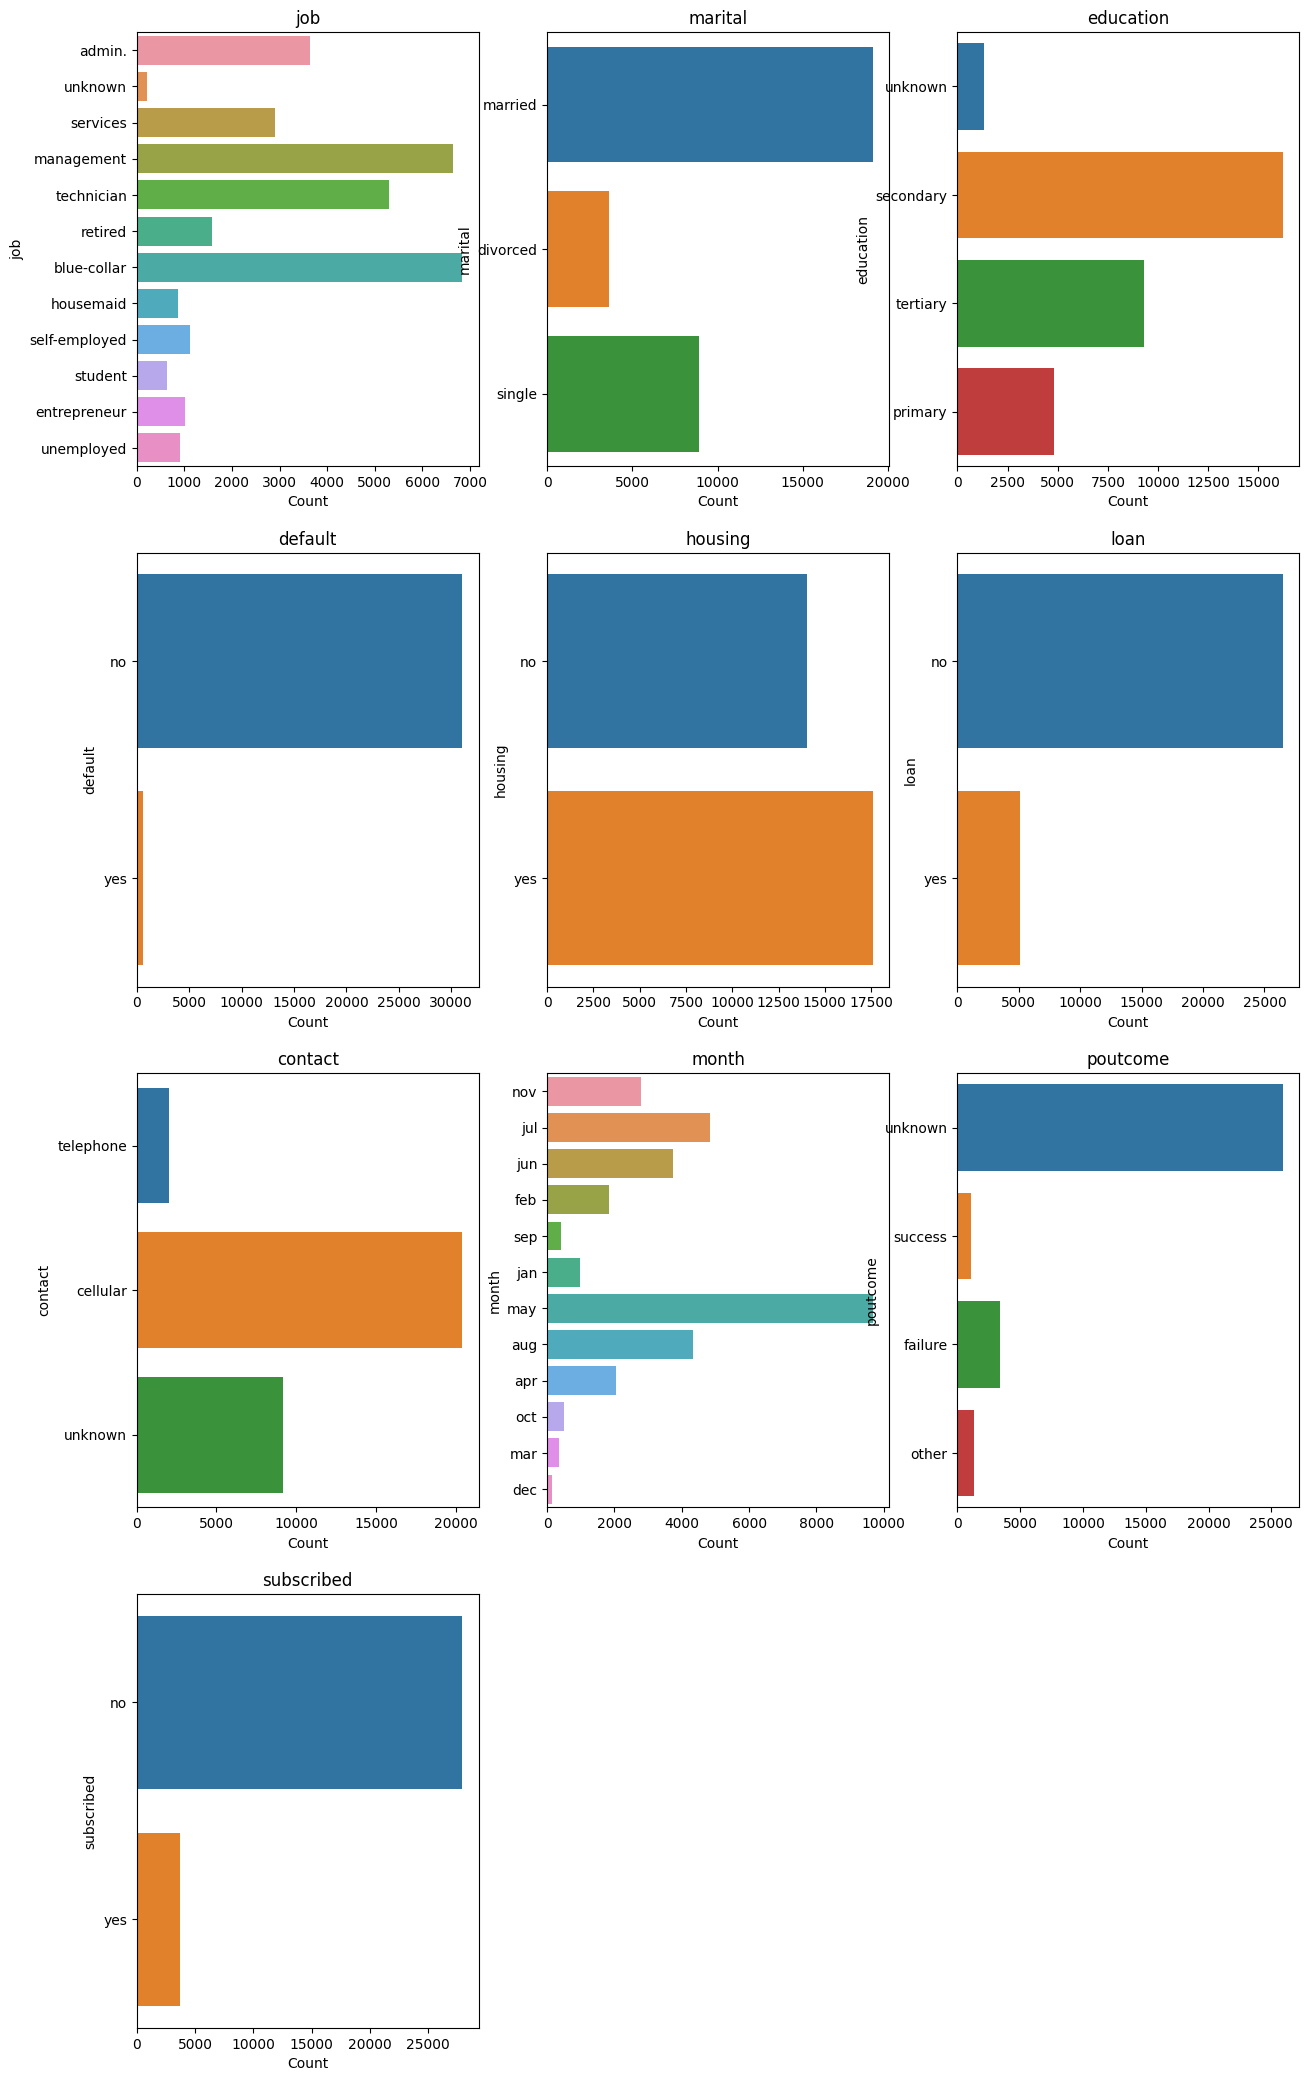

In [24]:
#Find Categorical Feature Distribution

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for i in cat_col:
    
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=i,data=df_train)
    plt.xlabel('Count')
    plt.title(i)
    plotnumber+=1
plt.show()

Take-away:

client with job type as management records are high in given dataset and housemaid are very less
client who married are high in records in given dataset and divorced are less
client whoes education background is secondary are in high numbers in given dataset
defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
data in month of may is high and less in dec

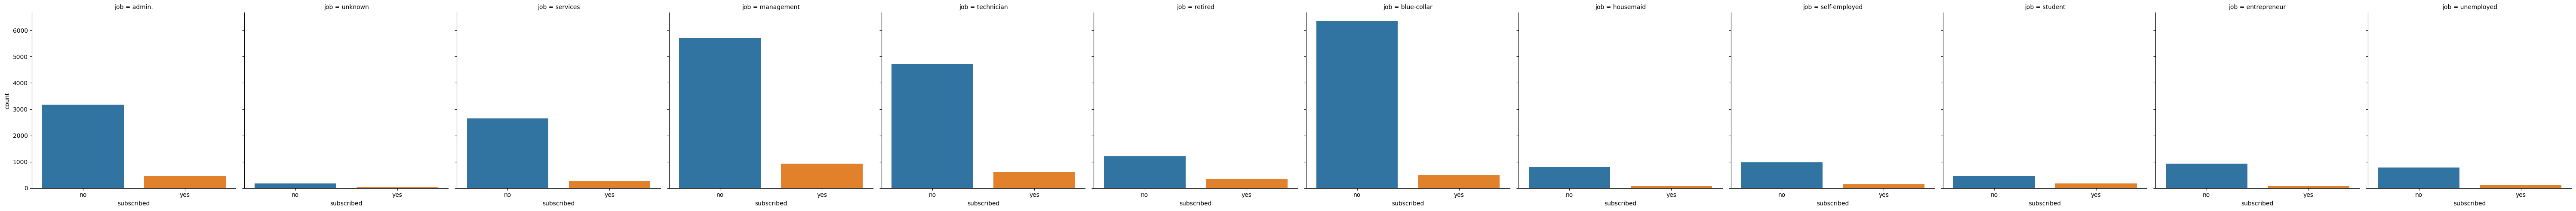

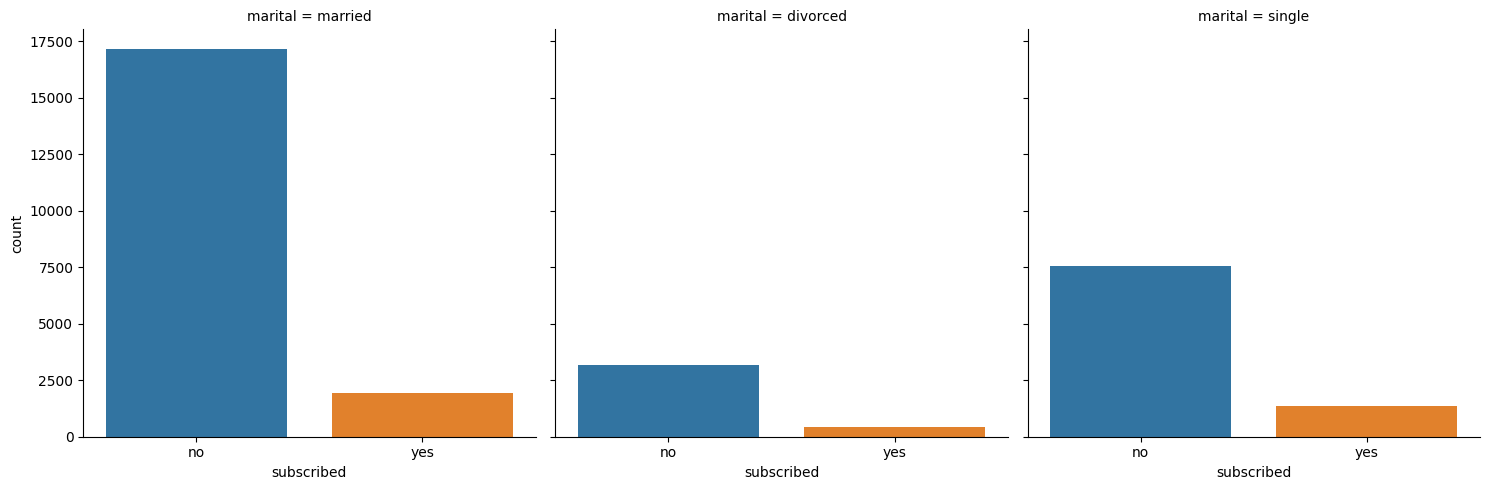

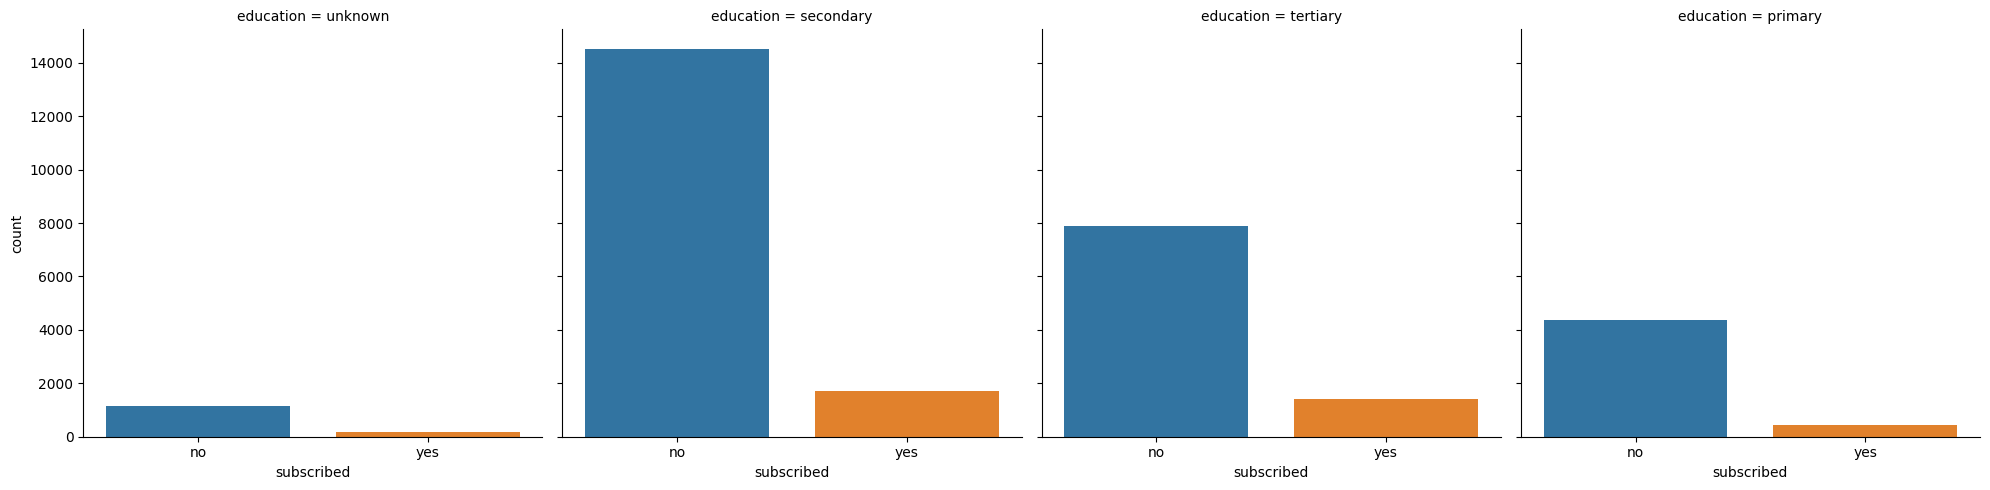

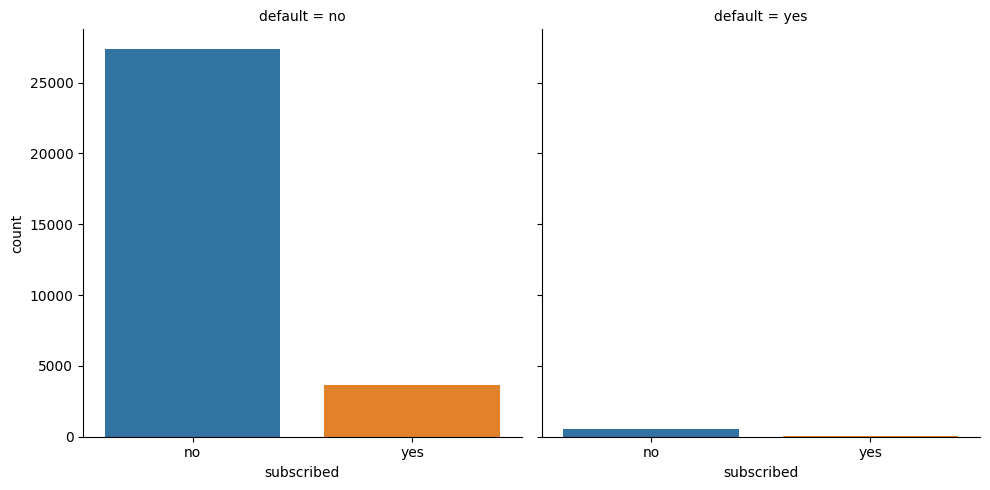

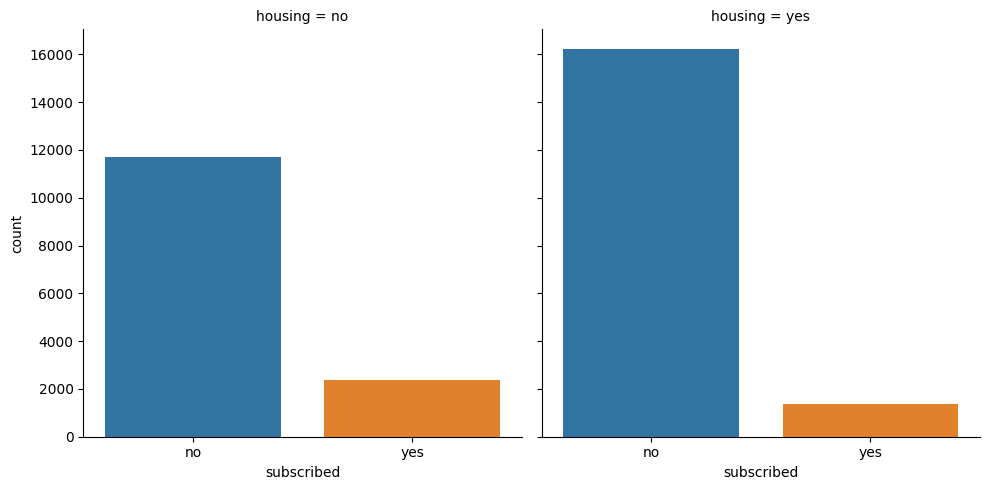

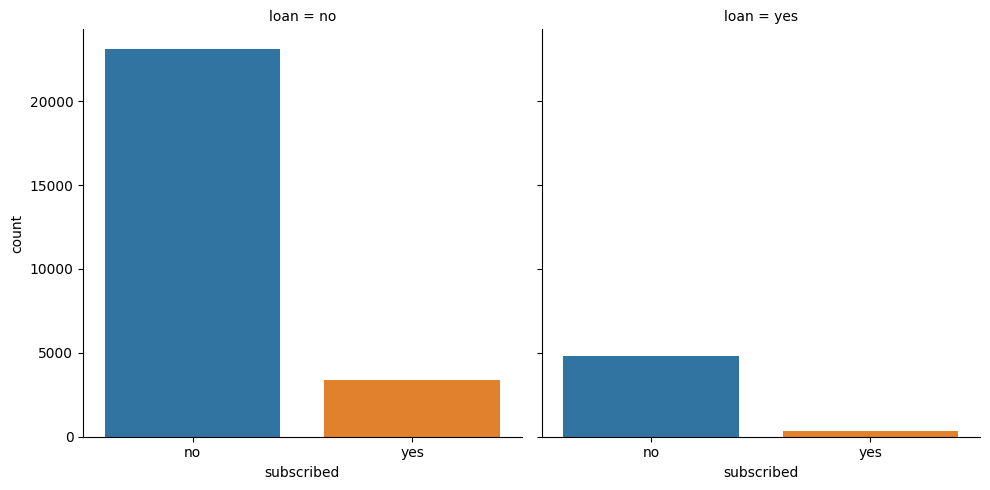

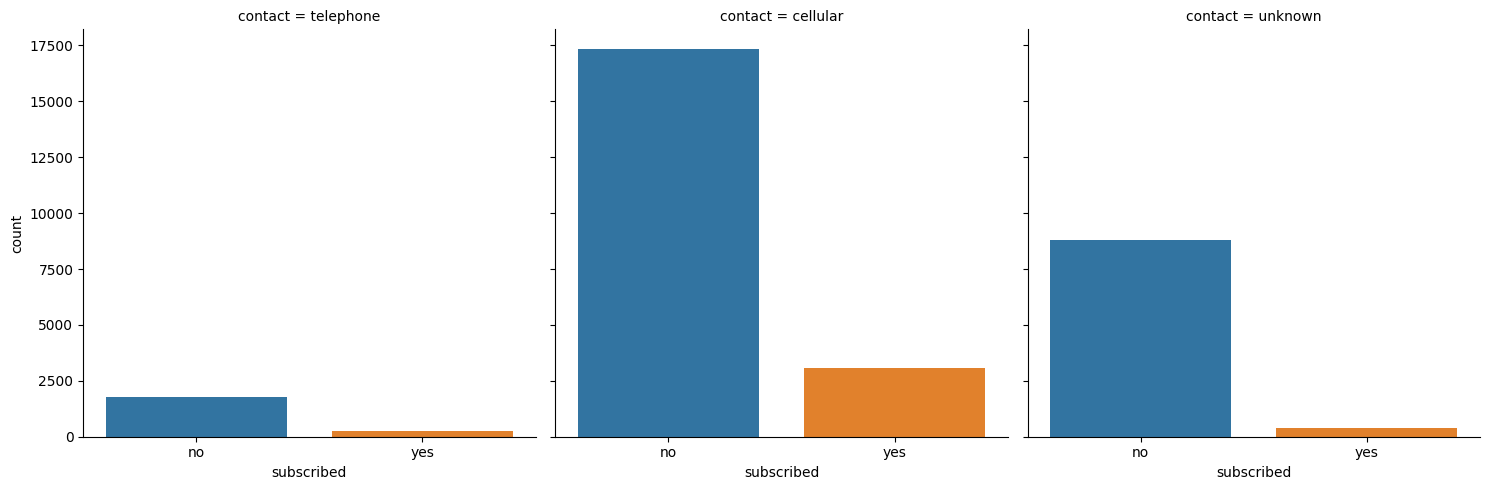

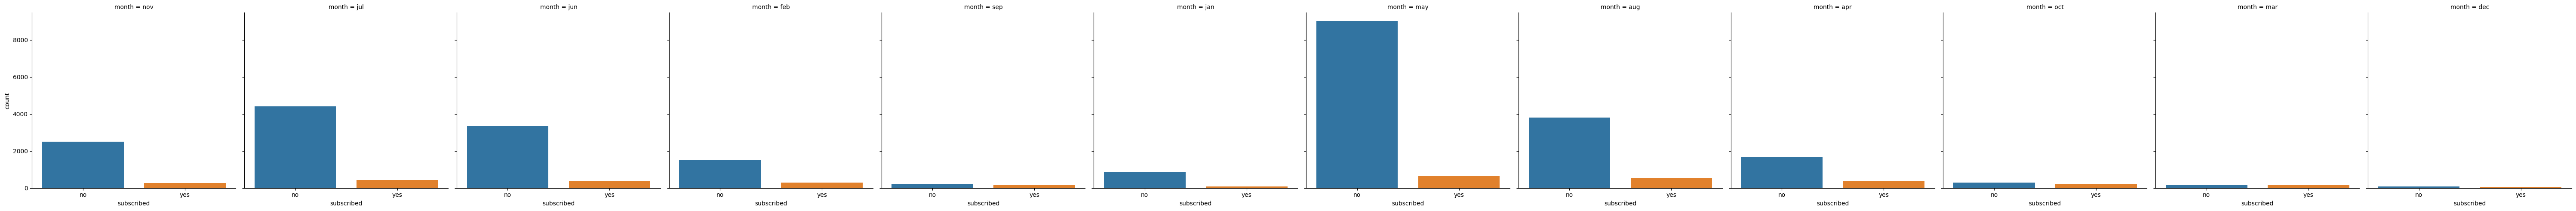

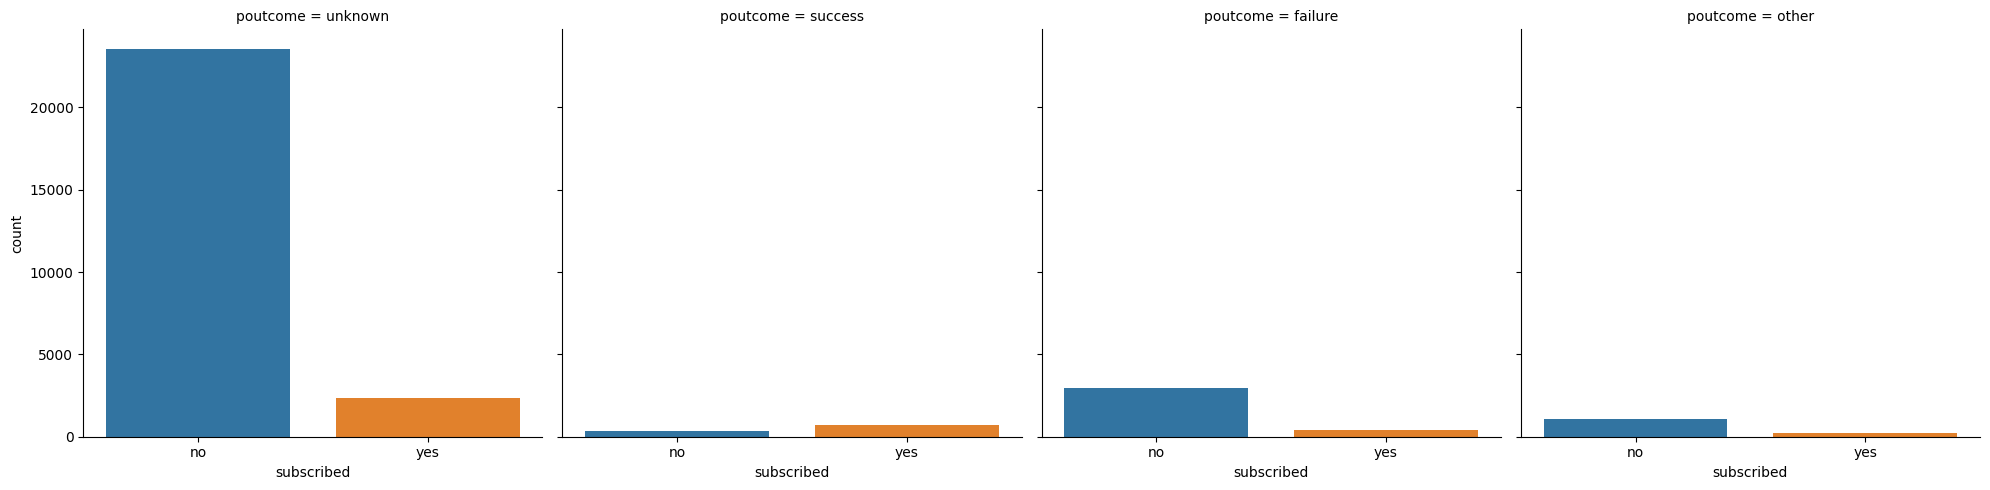

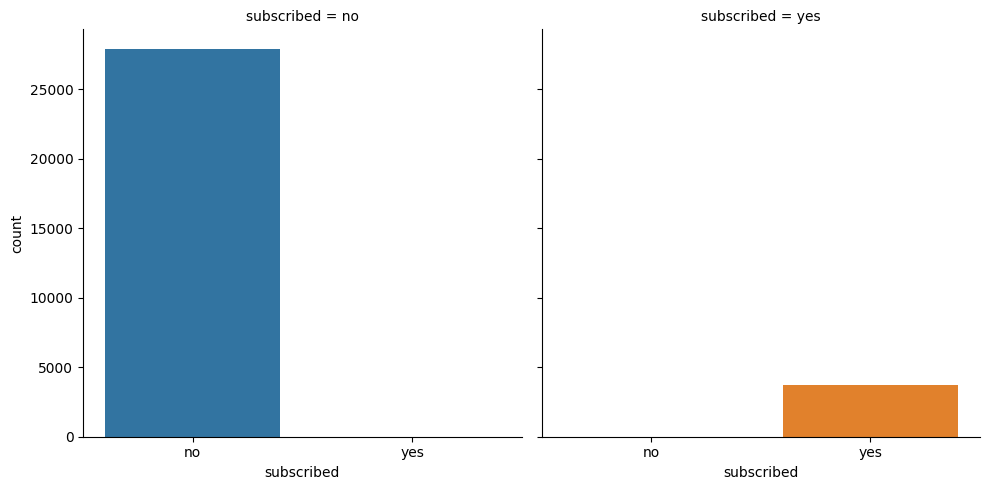

In [25]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for i in cat_col:
    sns.catplot(x='subscribed', col=i, kind='count', data= df_train)
plt.show()

retired client has high interest on deposit
client who has housing loan seems to be not interested much on deposit
if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
in month of March, September, October and December, client show high interest to deposit
in month of may, records are high but client interst ratio is very less

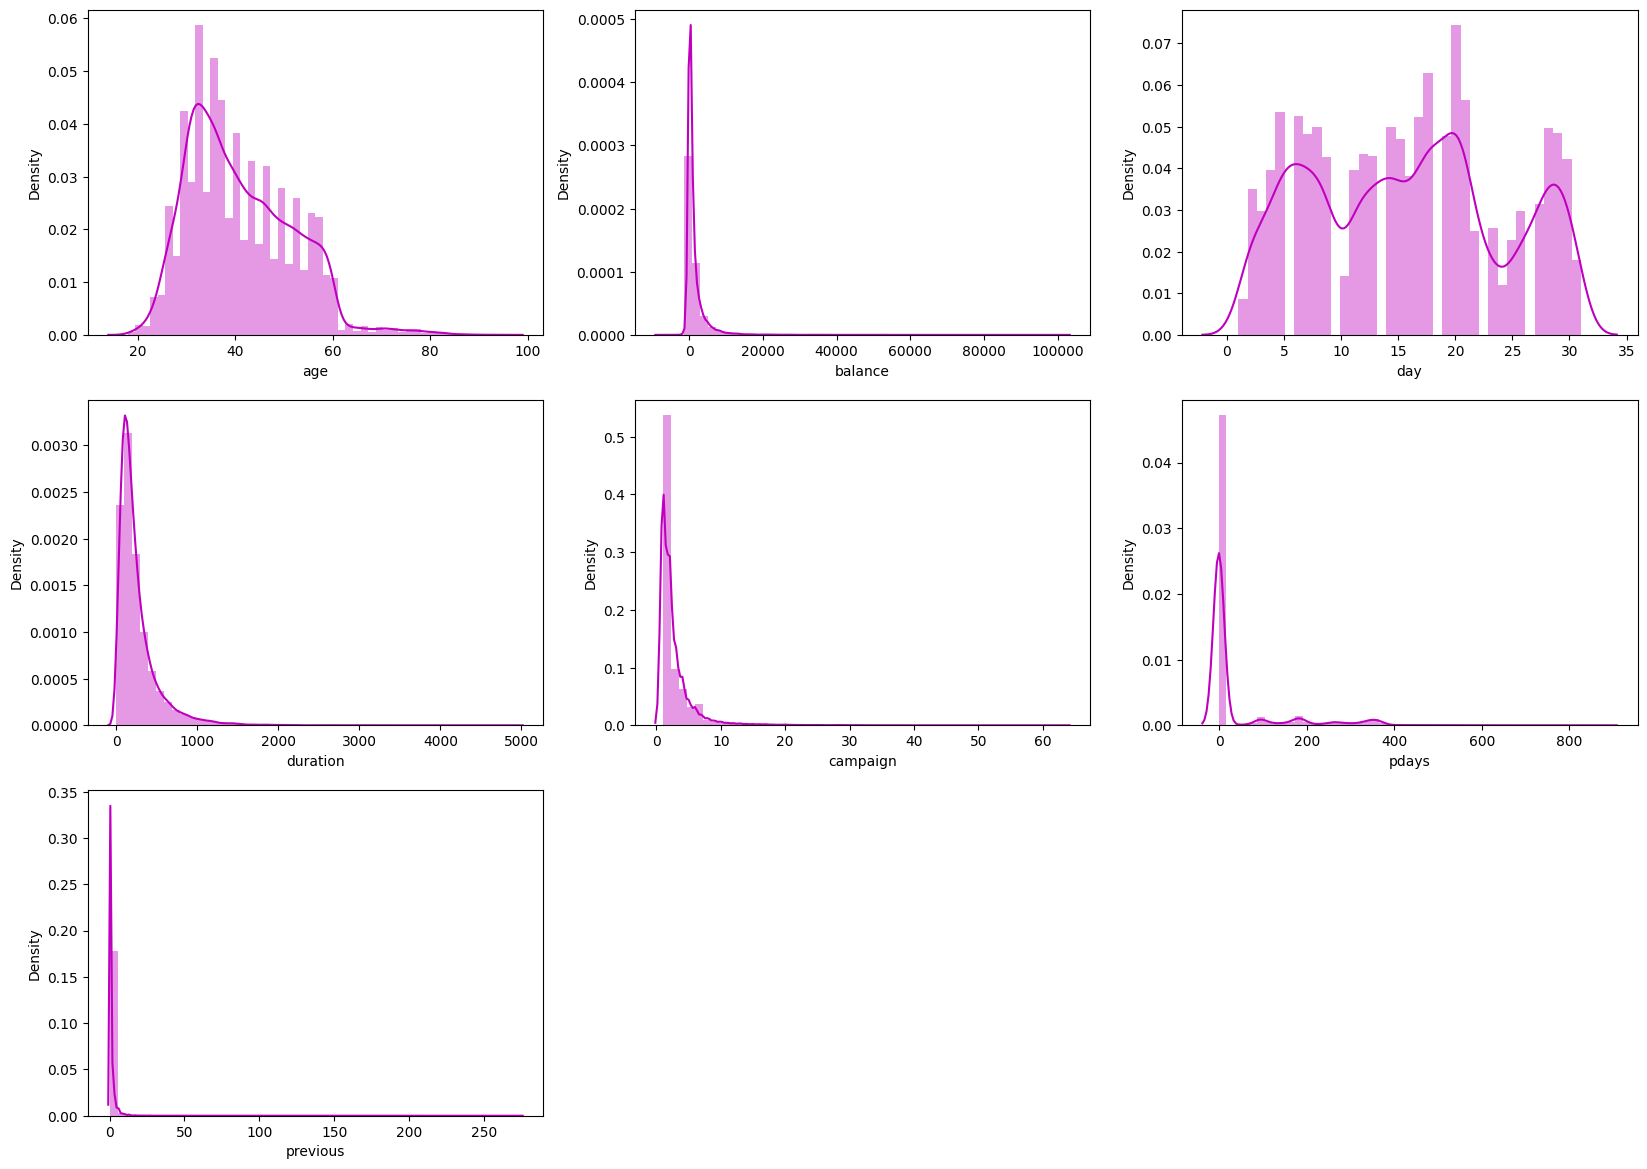

In [28]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for col in num_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df_train[col],color='m')
    plt.xlabel(col)
    plotnumber+=1
plt.show()

In [5]:
# Encoding catogorical column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_train.columns:
    if df_train[i].dtypes=='object':
        df_train[i]=OE.fit_transform(df_train[i].values.reshape(-1,1))
df_train
    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [37]:
df_train.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [6]:
col=df_train.drop('subscribed',axis=1)

from scipy.stats import zscore

z=np.abs(zscore(col))
z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.237059,0.441777
1,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.237059,0.441777
2,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.237059,0.441777
3,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,1.001336,0.576498
4,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.237059,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.237059,0.441777
31643,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.237059,0.441777
31644,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.237059,0.441777
31645,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.716521,2.613048


In [7]:
# removing the datd above the zscore and creatin the new df

df_cleaned=df_train[(z<3).all(axis=1)]
print(df_cleaned.shape)


(27584, 17)


In [42]:
df_train.shape

(31647, 17)

In [45]:
df_cleaned.skew()

age           0.439159
job           0.258302
marital      -0.095968
education     0.197092
default       0.000000
balance       2.433928
housing      -0.207765
loan          1.829242
contact       0.698882
day           0.075854
month        -0.469448
duration      1.596175
campaign      2.064222
pdays         2.799415
previous      3.657231
poutcome     -2.449518
subscribed    2.624756
dtype: float64

In [43]:
plt.figure(figsize=(100, 125), facecolor='white')

p = 1

for i in df_train.columns:
    if p <= 17:
        axs = plt.subplot(7, 6, p)  # Adjusted to 7 rows by 6 columns
        sns.histplot(df_train[i], kde=True, color='r', ax=axs)
        plt.xlabel(i, fontsize=20)  # Corrected to use column name as label
        plt.ylabel('count', fontsize=20)
        
        p += 1
plt.tight_layout()
plt.show()

In [47]:

# checking outliars



plt.figure(figsize=(100, 125), facecolor='white')

p = 1

for i in df_train.columns:
    if p <= 17:
        axs = plt.subplot(7, 6, p)  # Adjusted to 7 rows by 6 columns
        sns.boxplot(df_train[i], color='m')
        plt.xlabel(i, fontsize=20)  # Corrected to use column name as label
        plt.ylabel('count', fontsize=20)
        
        p += 1
plt.tight_layout()
plt.show()


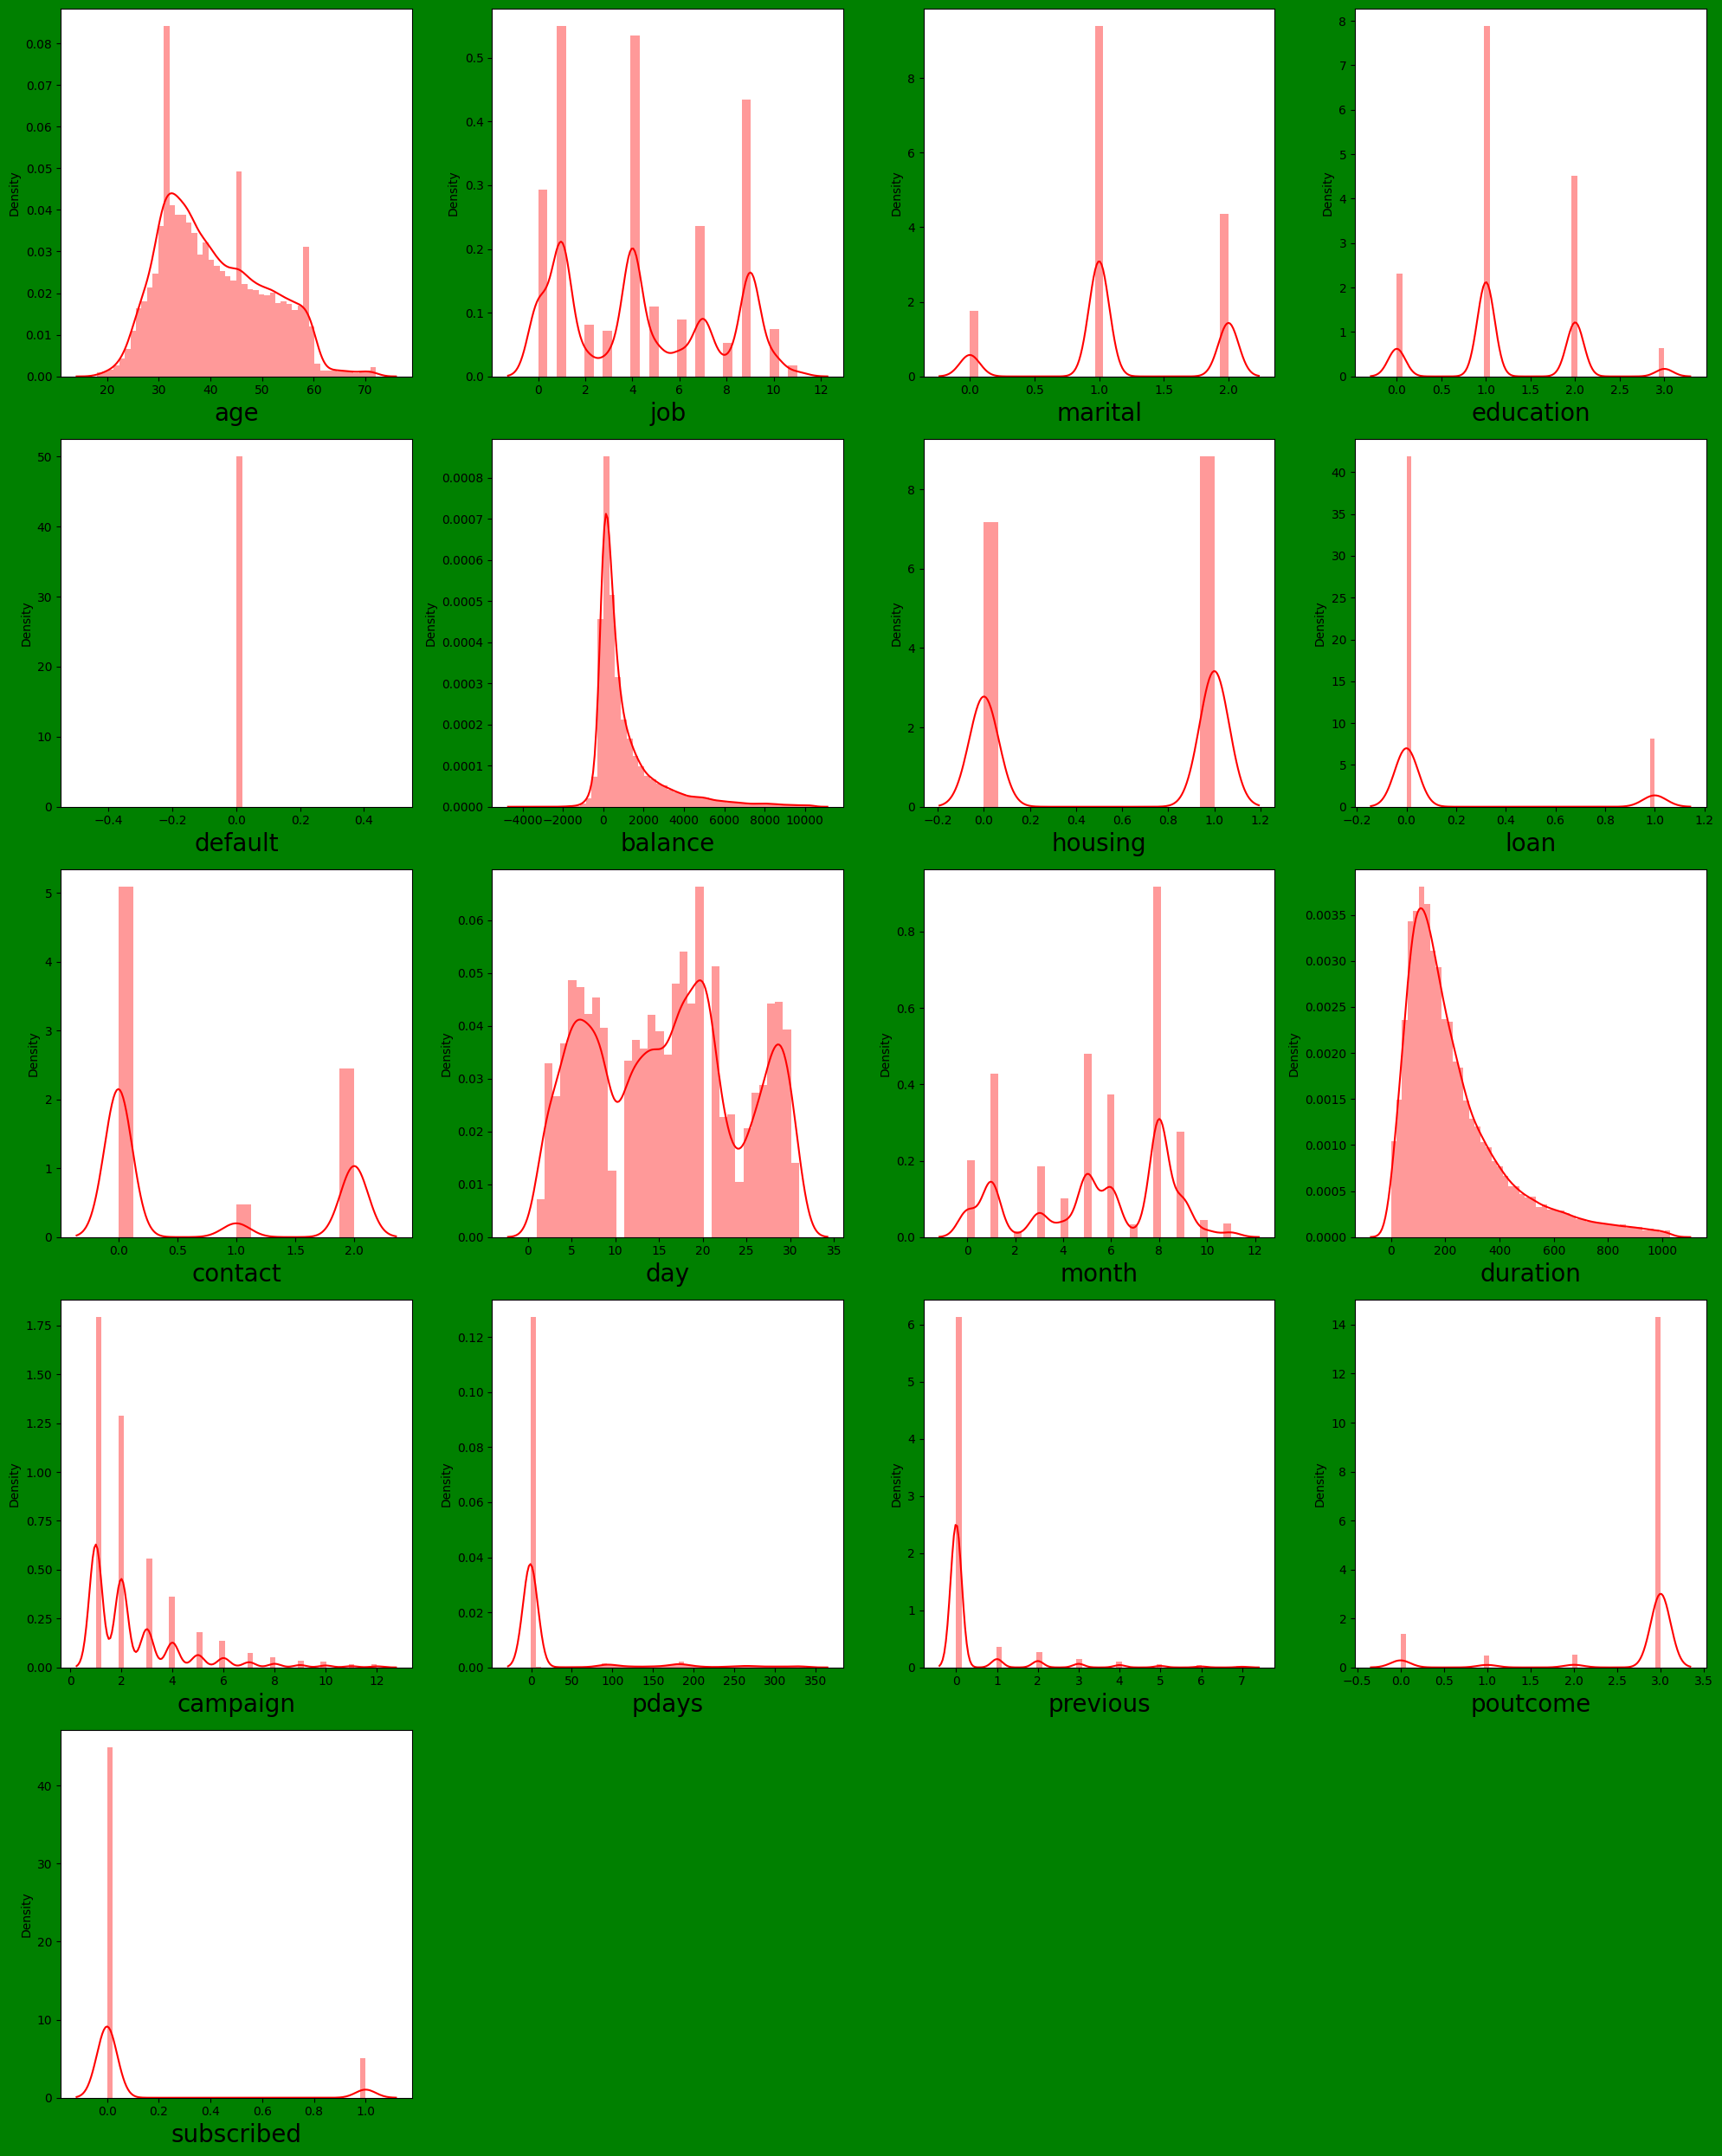

In [50]:
plt.figure(figsize=(20,25),facecolor='green')
p=1
for column in df_cleaned.columns:
    if p<=17:
        axs=plt.subplot(5,4,p)
        sns.distplot(df_cleaned[column],color='red')
        plt.xlabel(column,fontsize=20)
    p+=1
plt.tight_layout()
    


<Axes: >

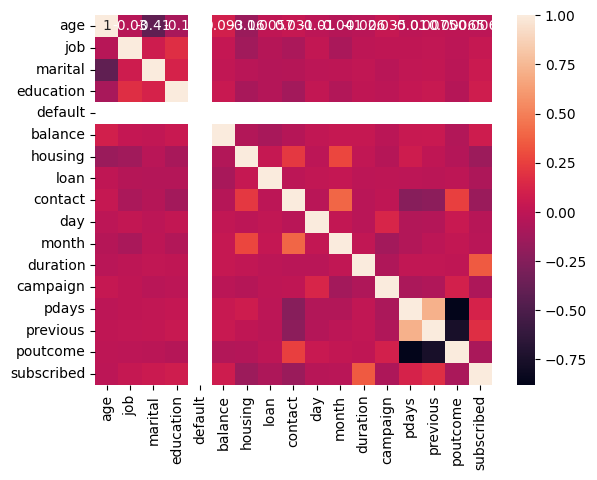

In [51]:
sns.heatmap(df_cleaned.corr(),annot=True)

In [8]:
df_cleaned = df_cleaned.dropna(axis=1, how='all')

In [9]:
df_cleaned.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27584 entries, 0 to 31644
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         27584 non-null  int64  
 1   job         27584 non-null  float64
 2   marital     27584 non-null  float64
 3   education   27584 non-null  float64
 4   default     27584 non-null  float64
 5   balance     27584 non-null  int64  
 6   housing     27584 non-null  float64
 7   loan        27584 non-null  float64
 8   contact     27584 non-null  float64
 9   day         27584 non-null  int64  
 10  month       27584 non-null  float64
 11  duration    27584 non-null  int64  
 12  campaign    27584 non-null  int64  
 13  pdays       27584 non-null  int64  
 14  previous    27584 non-null  int64  
 15  poutcome    27584 non-null  float64
 16  subscribed  27584 non-null  float64
dtypes: float64(10), int64(7)
memory usage: 3.8 MB


In [12]:
# Check for constant values
constant_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() <= 1]
print(f"Columns with constant values: {constant_columns}")

Columns with constant values: ['default']


In [13]:
# Remove columns with constant values
df_cleaned = df_cleaned.drop(columns=constant_columns)

In [14]:
corr_matrix = df_cleaned.corr()

In [15]:
# Drop rows and columns where all values are NaN
corr_matrix = corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

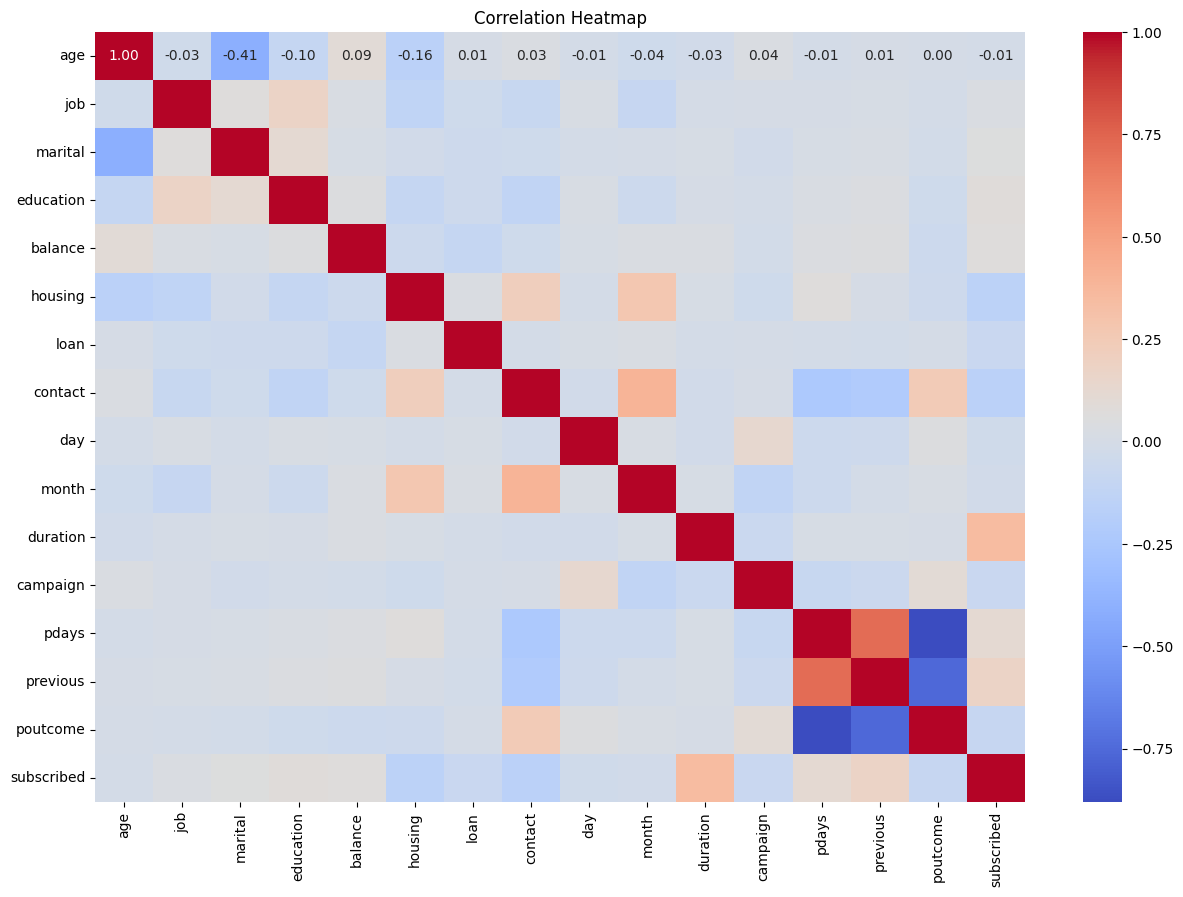

In [16]:
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# splitting x, y

x=df_cleaned.drop('subscribed',axis=1)
y = df_cleaned['subscribed']

print(x)
print(y)

       age   job  marital  education  balance  housing  loan  contact  day  \
0       56   0.0      1.0        3.0     1933      0.0   0.0      1.0   19   
1       31  11.0      1.0        1.0        3      0.0   0.0      0.0   20   
2       27   7.0      1.0        1.0      891      1.0   0.0      0.0   18   
3       57   4.0      0.0        2.0     3287      0.0   0.0      0.0   22   
4       31   9.0      1.0        1.0      119      1.0   0.0      0.0    4   
...    ...   ...      ...        ...      ...      ...   ...      ...  ...   
31640   43   4.0      2.0        1.0     2968      0.0   0.0      2.0   20   
31641   37   9.0      2.0        2.0     1309      0.0   0.0      2.0    6   
31642   29   4.0      2.0        2.0        0      1.0   0.0      0.0   12   
31643   53   4.0      0.0        2.0      380      0.0   1.0      0.0    5   
31644   32   4.0      2.0        2.0      312      0.0   0.0      0.0    7   

       month  duration  campaign  pdays  previous  poutcome  
0

In [18]:
y.value_counts()

subscribed
0.0    24762
1.0     2822
Name: count, dtype: int64

In [19]:
# oversampling the data 
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)
print(x1)
print(y1)

# in Oversampling SMOTE will create new lines to balance the data
# in UnderSampling SMOTe will remove the lines or rows to balance the ratio of y 

       age        job   marital  education  balance   housing      loan  \
0       56   0.000000  1.000000   3.000000     1933  0.000000  0.000000   
1       31  11.000000  1.000000   1.000000        3  0.000000  0.000000   
2       27   7.000000  1.000000   1.000000      891  1.000000  0.000000   
3       57   4.000000  0.000000   2.000000     3287  0.000000  0.000000   
4       31   9.000000  1.000000   1.000000      119  1.000000  0.000000   
...    ...        ...       ...        ...      ...       ...       ...   
49519   32   6.115814  1.000000   2.000000     1340  0.000000  0.000000   
49520   34   7.200047  1.000000   1.000000     3442  0.899977  0.100023   
49521   35   4.152571  1.847429   1.847429     4873  0.000000  0.000000   
49522   42   0.000000  1.376387   1.000000      744  1.000000  0.000000   
49523   51   4.000000  1.000000   1.998405     2634  0.000000  0.000000   

        contact  day     month  duration  campaign  pdays  previous  poutcome  
0      1.000000   1

In [20]:
y1.value_counts()

subscribed
0.0    24762
1.0    24762
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier , BaggingClassifier,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report,roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [22]:
# Data Standardisation

from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

x=pd.DataFrame(Scaler.fit_transform(x1),columns=x1.columns)
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.556545,-1.491690,-0.367328,2.459631,0.367883,-0.977707,-0.397278,0.656641,0.466327,1.231038,-1.170593,-0.065019,-0.474530,-0.435839,0.483753
1,-0.919475,2.142970,-0.367328,-0.437110,-0.703677,-0.977707,-0.397278,-0.608596,0.593292,-0.137819,-0.973383,-0.065019,-0.474530,-0.435839,0.483753
2,-1.315639,0.821275,-0.367328,-0.437110,-0.210649,1.165040,-0.397278,-0.608596,0.339362,-0.137819,-0.348187,-0.663083,-0.474530,-0.435839,0.483753
3,1.655586,-0.169995,-2.098276,1.011260,1.119640,-0.977707,-0.397278,-0.608596,0.847222,0.204395,2.282675,-0.663083,0.673266,2.122169,-0.655655
4,-0.919475,1.482123,-0.367328,-0.437110,-0.639272,1.165040,-0.397278,-0.608596,-1.438145,-0.822248,0.239247,-0.663083,-0.474530,-0.435839,0.483753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49519,-0.820434,0.529120,-0.367328,1.011260,0.038642,-0.977707,-0.397278,0.851075,-1.565110,0.796601,-0.264268,-0.663083,-0.474530,-0.435839,0.483753
49520,-0.622353,0.887376,-0.367328,-0.437110,1.205698,0.950715,-0.079079,0.530088,0.720257,1.333647,-0.763586,-0.663083,0.632756,2.122169,-2.592568
49521,-0.523312,-0.119582,1.099528,0.790281,2.000207,-0.977707,-0.397278,-0.608596,-0.295462,-1.036769,0.902207,-0.663083,-0.474530,-0.435839,0.483753
49522,0.169974,-1.491690,0.284178,-0.437110,-0.292265,1.165040,-0.397278,-0.608596,0.593292,-1.208663,-0.902052,0.533046,-0.474530,-0.435839,0.483753


In [23]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

# perfect positive corelation with target hence no need to drop any feature

,VIF Values,Features
0,1.341089,age
1,1.048790,job
2,1.302558,marital
3,1.083767,education
4,1.049252,balance
5,1.181041,housing
6,1.026571,loan
7,1.299135,contact
8,1.022651,day
9,1.181516,month


 # applying EDA on test data file

In [24]:
# Encoding catogorical column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=OE.fit_transform(df_test[i].values.reshape(-1,1))
df_test
    

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,45163,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [25]:
df_test=df_test.drop('ID',axis=1)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        13564 non-null  int64  
 1   job        13564 non-null  float64
 2   marital    13564 non-null  float64
 3   education  13564 non-null  float64
 4   default    13564 non-null  float64
 5   balance    13564 non-null  int64  
 6   housing    13564 non-null  float64
 7   loan       13564 non-null  float64
 8   contact    13564 non-null  float64
 9   day        13564 non-null  int64  
 10  month      13564 non-null  float64
 11  duration   13564 non-null  int64  
 12  campaign   13564 non-null  int64  
 13  pdays      13564 non-null  int64  
 14  previous   13564 non-null  int64  
 15  poutcome   13564 non-null  float64
dtypes: float64(9), int64(7)
memory usage: 1.7 MB


In [26]:
df_test.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

In [27]:
col=df_test

from scipy.stats import zscore

z=np.abs(zscore(col))
z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.838114,0.807551,0.276592,0.301053,0.131336,0.402389,0.893033,0.429564,0.704444,0.089124,0.829938,0.921849,1.058702,0.418199,0.297500,0.452163
1,3.499987,0.196760,1.914173,1.642982,0.131336,0.463375,1.119779,0.429564,0.413763,1.778340,0.165753,0.439963,0.574850,0.418199,0.297500,0.452163
2,0.932421,0.502156,1.360988,1.040875,0.131336,0.393955,0.893033,0.429564,1.531969,0.031534,0.829938,1.616074,0.574850,0.418199,0.297500,0.452163
3,1.519549,0.807551,1.360988,1.642982,0.131336,0.784508,0.893033,0.429564,0.413763,0.330440,0.829938,0.747754,0.248140,0.418199,0.297500,0.452163
4,0.387871,1.024823,1.914173,0.301053,0.131336,0.669352,1.119779,2.327941,1.531969,1.537023,0.165753,0.569789,0.574850,0.418199,0.297500,0.452163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.177969,0.108636,0.276592,1.040875,0.131336,0.426069,1.119779,0.429564,0.704444,1.479434,1.493340,0.426644,0.405281,0.418199,0.297500,0.452163
13560,1.236630,1.024823,0.276592,1.642982,0.131336,0.299239,0.893033,0.429564,1.531969,0.514168,0.166144,0.387957,0.574850,0.418199,0.297500,0.452163
13561,0.555195,0.196760,0.276592,1.642982,0.131336,0.348218,0.893033,0.429564,0.704444,1.600092,0.497650,0.473070,0.574850,0.418199,0.297500,0.452163
13562,1.121034,1.330219,1.360988,0.301053,0.131336,0.290155,1.119779,0.429564,0.704444,0.813073,1.161835,0.194517,0.248140,0.483926,1.203911,0.542830


In [28]:
# removing the datd above the zscore and creatin the new df

df=df_test[(z<3).all(axis=1)]
print(df.shape)

(11821, 16)


In [79]:
df_test.shape

(13564, 16)

<Axes: >

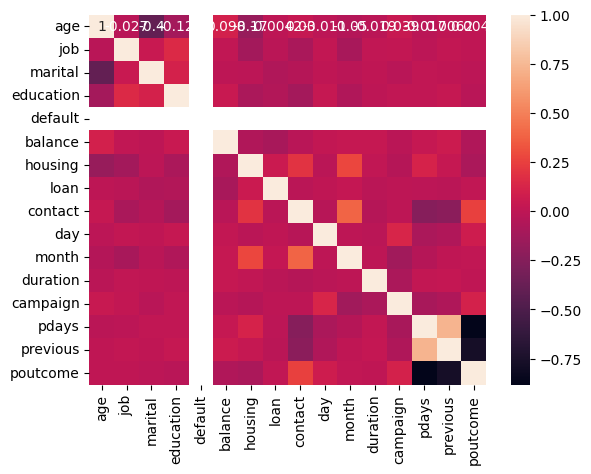

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
# Check for constant values
constant_columns1 = [col for col in df.columns if df[col].nunique() <= 1]
print(f"Columns with constant values: {constant_columns1}")

Columns with constant values: ['default']


In [31]:
# Remove columns with constant values
df = df.drop(columns=constant_columns1)

corr_matrix = df.corr()

# Drop rows and columns where all values are NaN
corr_matrix = corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

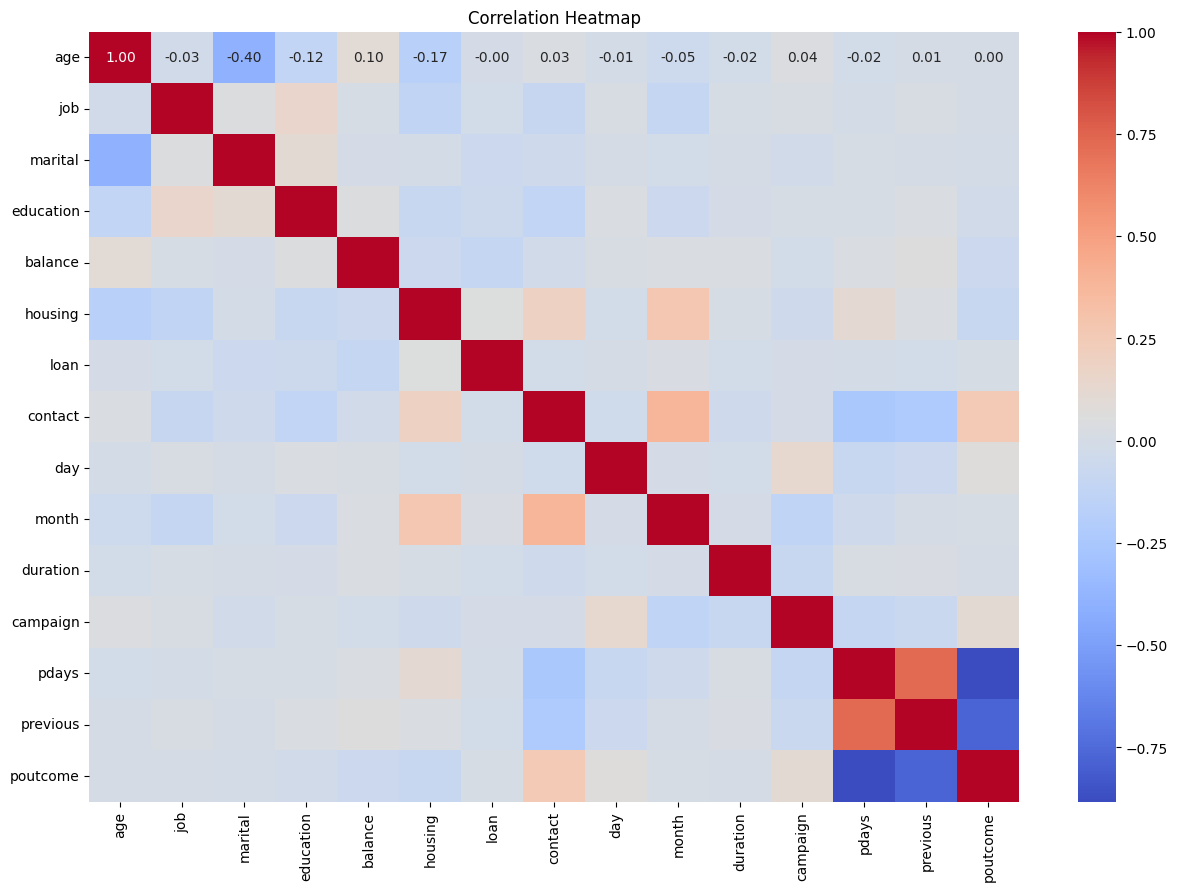

In [32]:
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
x_test=df

In [35]:
# Data Standardisation

from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

x_test_scaler=pd.DataFrame(Scaler.fit_transform(x_test),columns=x_test.columns)


x_test_scaler




,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.859195,0.800348,-0.273498,-0.301166,-0.566807,0.898760,-0.431155,-0.723178,-0.084720,0.848032,-1.130313,1.885737,-0.374479,-0.348498,0.393014
1,-0.957955,0.496178,1.370131,1.047352,-0.551934,0.898760,-0.431155,1.477539,0.035881,0.848032,2.303240,-0.760680,-0.374479,-0.348498,0.393014
2,1.609798,0.800348,1.370131,-1.649685,1.526358,0.898760,-0.431155,0.377181,-0.325922,0.848032,-0.894780,-0.231396,-0.374479,-0.348498,0.393014
3,0.424681,-1.024674,-1.917126,-0.301166,-1.037612,-1.112645,2.319350,1.477539,-1.531932,-0.151628,-0.654012,-0.760680,-0.374479,-0.348498,0.393014
4,-0.859195,-0.112163,1.370131,1.047352,-0.634310,0.898760,-0.431155,-0.723178,0.759488,-0.151628,1.146509,-0.231396,-0.374479,-0.348498,0.393014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11816,-0.859195,1.408688,1.370131,-0.301166,-0.560515,0.898760,-0.431155,-0.723178,-1.049528,0.848032,-0.120137,-0.760680,-0.374479,-0.348498,0.393014
11817,-0.167877,-0.112163,-0.273498,1.047352,-0.608568,-1.112645,-0.431155,-0.723178,1.483094,-1.484508,-0.460352,0.827171,-0.374479,-0.348498,0.393014
11818,1.313519,-1.024674,-0.273498,-1.649685,0.670557,0.898760,-0.431155,1.477539,0.518286,0.181592,-0.408011,-0.760680,-0.374479,-0.348498,0.393014
11819,-0.562916,0.192007,-0.273498,-1.649685,-0.471273,0.898760,-0.431155,-0.723178,1.603695,-0.484848,-0.523160,-0.760680,-0.374479,-0.348498,0.393014


In [36]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_test=pd.DataFrame()

vif_test['VIF Values']=[variance_inflation_factor(x_test_scaler.values,i) for i in range(len(x_test_scaler.columns))]
vif_test['Features']=x_test_scaler.columns
vif_test

# perfect positive corelation with target hence no need to drop any feature

,VIF Values,Features
0,1.273660,age
1,1.045025,job
2,1.215558,marital
3,1.063894,education
4,1.037177,balance
5,1.188673,housing
6,1.021529,loan
7,1.320869,contact
8,1.027701,day
9,1.285490,month


### since we have already test file so we will not split train test data fro train file and will go to build the model

In [37]:
# Initialize the model
RFC = RandomForestClassifier()

# Train the model


X_train_split, X_val, y_train_split, y_val = train_test_split(x, y1, test_size=0.2, random_state=42)
RFC.fit(X_train_split, y_train_split)
y_val_pred = RFC.predict(X_val)

In [38]:
# Evaluate on validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = RFC.predict(x_test_scaler)

print(y_test_pred)

Validation Accuracy: 0.9517415446744069
Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      4866
         1.0       0.96      0.94      0.95      5039

    accuracy                           0.95      9905
   macro avg       0.95      0.95      0.95      9905
weighted avg       0.95      0.95      0.95      9905

[1. 1. 1. ... 1. 1. 1.]


In [39]:
# Extra Tree Classfier 

ET=ExtraTreesClassifier()
ET.fit(X_train_split,y_train_split)
PredET=ET.predict(X_val)

# Evaluate on validation set
print("Validation Accuracy:", accuracy_score(y_val, PredET))
print("Validation Classification Report:\n", classification_report(y_val, PredET))

# Make predictions on the test set
y_test_pred = ET.predict(x_test_scaler)

print(y_test_pred)

Validation Accuracy: 0.9564866229177184
Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      4866
         1.0       0.96      0.96      0.96      5039

    accuracy                           0.96      9905
   macro avg       0.96      0.96      0.96      9905
weighted avg       0.96      0.96      0.96      9905

[1. 1. 1. ... 1. 1. 1.]


In [40]:
# Cross-validation score for ET Classifier

scoreET = cross_val_score(ET, x, y1, cv=5)
print("Cross-validation scores for Extra Trees Classifier:", scoreET)
print("Mean cross-validation score for Extra Trees Classifier:", scoreET.mean())
print("Difference between Accuracy score and cross-validation score for Extra Trees Classifier:", accuracy_score(y_val, PredET) - scoreET.mean())

Cross-validation scores for Extra Trees Classifier: [0.87884907 0.9750631  0.97496214 0.97566885 0.97354604]
Mean cross-validation score for Extra Trees Classifier: 0.9556178404046847
Difference between Accuracy score and cross-validation score for Extra Trees Classifier: 0.0008687825130336835


In [41]:
# Cross-validation score for Random Forest Classifier
scoreRFC = cross_val_score(RFC, x, y1, cv=5)
print("Cross-validation scores for Random Forest Classifier:", scoreRFC)
print("Mean cross-validation score for Random Forest Classifier:", scoreRFC.mean())
print("Difference between Accuracy score and cross-validation score for Random Forest Classifier:", accuracy_score(y_val, y_val_pred) - scoreRFC.mean())


Cross-validation scores for Random Forest Classifier: [0.78455326 0.97718324 0.977789   0.97819283 0.97637318]
Mean cross-validation score for Random Forest Classifier: 0.9388183013262503
Difference between Accuracy score and cross-validation score for Random Forest Classifier: 0.012923243348156532


In [ ]:
# Extra Tree Classfier  accuracy score is better hence this will be our best model

In [ ]:
# Hyperparamenter tunning

In [42]:
from sklearn.model_selection import GridSearchCV

parameters={
    'criterion':['gini','entropy'],
    'random_state':[10,50,1000],
    'max_depth': [0,10,20],
    'n_jobs': [-2,-1,1],
    'n_estimators':[50,100,200,300]
}
parameters

{'criterion': ['gini', 'entropy'],
 'random_state': [10, 50, 1000],
 'max_depth': [0, 10, 20],
 'n_jobs': [-2, -1, 1],
 'n_estimators': [50, 100, 200, 300]}

In [43]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
GCV

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [44]:
GCV.fit(X_train_split,y_train_split)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [45]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [49]:
Final_model=ExtraTreesClassifier(criterion='gini',random_state=10,max_depth=20,n_jobs=-2,n_estimators=100)
Final_model.fit(X_train_split,y_train_split)
pred=Final_model.predict(x_test_scaler)

pred

array([1., 1., 1., ..., 1., 1., 1.])

### saving model


In [50]:
# Lets load the saved model and get the prediction 
import joblib
joblib.dump(Final_model,'Bank_Marketing.pkl')

model=joblib.load('Bank_Marketing.pkl')

# prediction

Prediction=model.predict(x_test_scaler)

Prediction
    


array([1., 1., 1., ..., 1., 1., 1.])

In [52]:
a=np.array(y_test_pred)
df=pd.DataFrame()
df["Predicted"]=Prediction
df['Original']=a
df

,Predicted,Original
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
11816,1.0,1.0
11817,1.0,0.0
11818,1.0,1.0
11819,1.0,1.0
